In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
from CENSAr.urban_scenarios import corrientes_stquo_2020

## 1. Escenario de crecimiento

In [4]:
# raster data analysis outputs
path00 = '../../CENSAr/data/ManchaUrbana_Corrientes_1999.geojson'
path10 = '../../CENSAr/data/ManchaUrbana_Corrientes_2010.geojson'
path20 = '../../CENSAr/data/ManchaUrbana_Corrientes_2022.geojson'

In [5]:
# se carga el escenario de crecimiento urbano proyectado a 2020
urban_growth = corrientes_stquo_2020(path00, path10, path20, control_flow={'allocation_method':'avoid_relocations'})

[19:40:39] INFO     loading                                                                      ]8;id=504796;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=774874;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    corrientes_2001.csv`                                                                           

           INFO     loading                                                                      ]8;id=688525;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=308726;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#112\112]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/tipo_vivienda_radios_                   
                    corrientes_2010.csv`                                                                           

[False]


[19:40:40] INFO     loadding                                                                     ]8;id=151538;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py\datasources.py]8;;\:]8;id=760306;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/datasources.py#160\160]8;;\
                    `https://storage.googleapis.com/python_mdg/censar_data/corrientes_tracts_pai                   
                    ring_0110.csv`                                                                                 

           INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=418657;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=16435;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=385762;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=140927;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

           INFO     Applying named aggregation `tipo vivienda particular`                                ]8;id=537666;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=33225;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#67\67]8;;\

           WARNING  Extra columns found for mapping formal: {'pieza en hotel o pension', 'casa a',      ]8;id=512938;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=769744;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    'casa b'}. Extra columns will be ignored.                                                      

           WARNING  Extra columns found for mapping situacion de calle: {'persona viviendo en la        ]8;id=588223;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py\core.py]8;;\:]8;id=265732;file:///home/fede/CEEU/CENSAr/CENSAr/CENSAr/aggregation/core.py#123\123]8;;\
                    calle'}. Extra columns will be ignored.                                                        

In [6]:
tipo_vivienda_agg_2001, tipo_vivienda_agg_2010, tipo_vivienda_agg_2020 = urban_growth[2001], urban_growth[2010], urban_growth[2020]
footpr_corrientes_00, footpr_corrientes_10, footpr_corrientes_20 =  urban_growth['footpr01'], urban_growth['footpr10'], urban_growth['footpr20']

# 2. Clusters según tipos de vivienda

In [7]:
tipo_vivienda_agg_2020.rename(columns={'total_viviendas':'total'}, inplace=True)

## 2.1. Grillas hexagonales - Viviendas totales

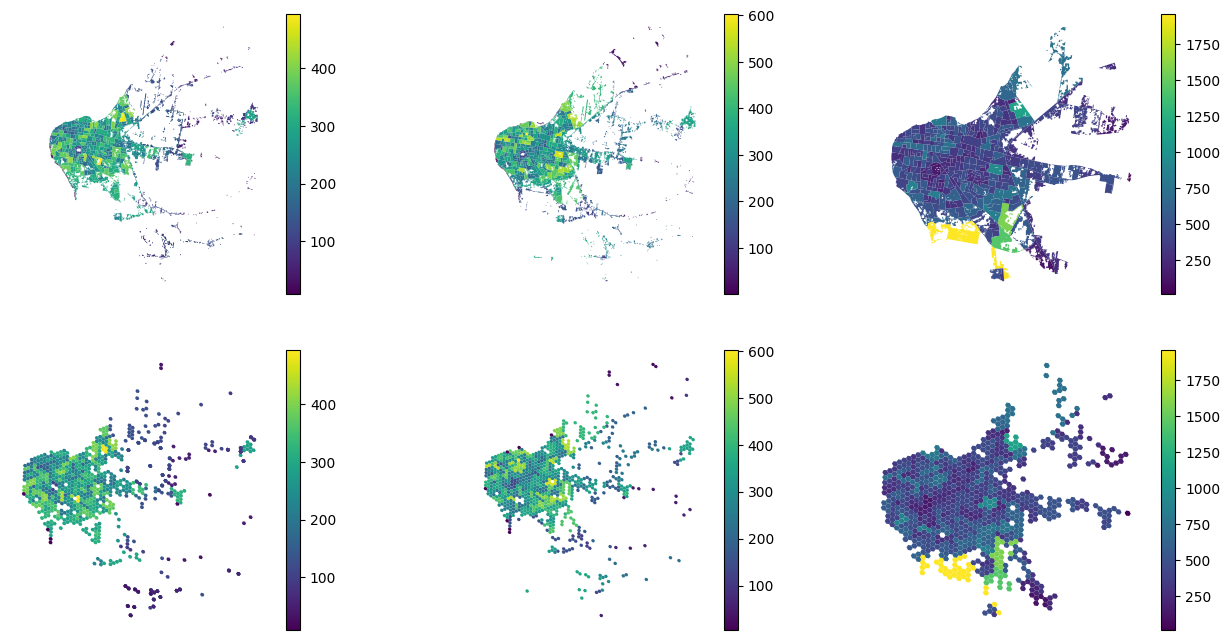

In [8]:
from CENSAr.clustering.geo_utils import geopandas_to_h3

fig, subplots = plt.subplots(2, 3, figsize=(16, 8))

tipo_vivienda_2001_h3 = geopandas_to_h3(tipo_vivienda_agg_2001, resolution=9)
tipo_vivienda_2010_h3 = geopandas_to_h3(tipo_vivienda_agg_2010, resolution=9)
tipo_vivienda_2020_h3 = geopandas_to_h3(tipo_vivienda_agg_2020.to_crs(tipo_vivienda_agg_2010.crs), resolution=9)

for ax, gdf in zip(subplots[0], [tipo_vivienda_agg_2001, tipo_vivienda_agg_2010, tipo_vivienda_agg_2020]):
    gdf.plot(column="total", legend=True, ax=ax)
    ax.set_axis_off();
for ax, gdf in zip(
    subplots[1], [tipo_vivienda_2001_h3, tipo_vivienda_2010_h3, tipo_vivienda_2020_h3]
):
    gdf.plot(column="total", legend=True, ax=ax)
    ax.set_axis_off();

## 2.2. Correlacion espacial por tipos de vivienda (LISAs)

In [9]:
from CENSAr.clustering.moran import lisa
from CENSAr.plots import plot_local_autocorrelation
from splot.esda import plot_moran

## 2001

In [10]:
import pandas as pd

P_VALUE = 0.05

indicadores = ["formal", "informal", "situacion de calle"]
lisas_2001 = lisa(tipo_vivienda_agg_2001, indicadores)
lisas_2001 = dict(zip(indicadores, lisas_2001))

full = pd.DataFrame(
    {
        "formal": lisas_2001["formal"].Is,
        "informal": lisas_2001["informal"].Is,
        "situacion de calle": lisas_2001["situacion de calle"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')


formal                0.495268
informal              0.634069
situacion de calle    0.006309
dtype: float64

In [11]:
global_formal, global_informal, global_calle =  lisa(tipo_vivienda_agg_2001, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I, global_calle.I)];

('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')
Autocorrelación espacial global:0.29
Autocorrelación espacial global:0.23
Autocorrelación espacial global:-0.04


In [12]:
[print(f"Significatividad estadística:{round(i,2)}") for i in (global_formal.p_sim, global_informal.p_sim, global_calle.p_sim)];

Significatividad estadística:0.0
Significatividad estadística:0.0
Significatividad estadística:0.08


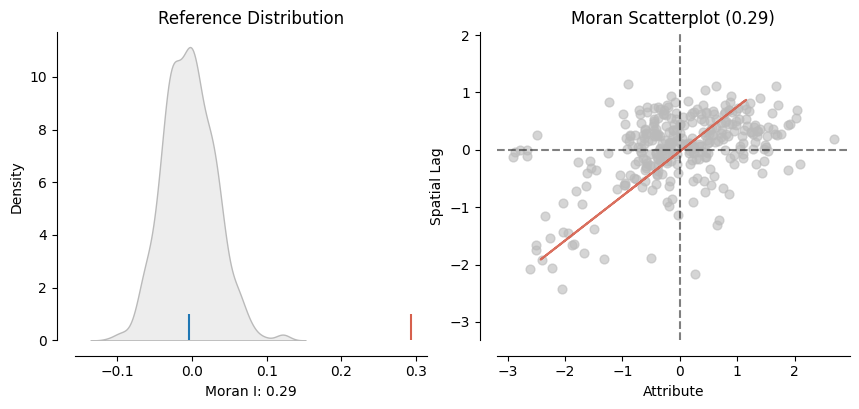

In [13]:
plot_moran(global_formal);

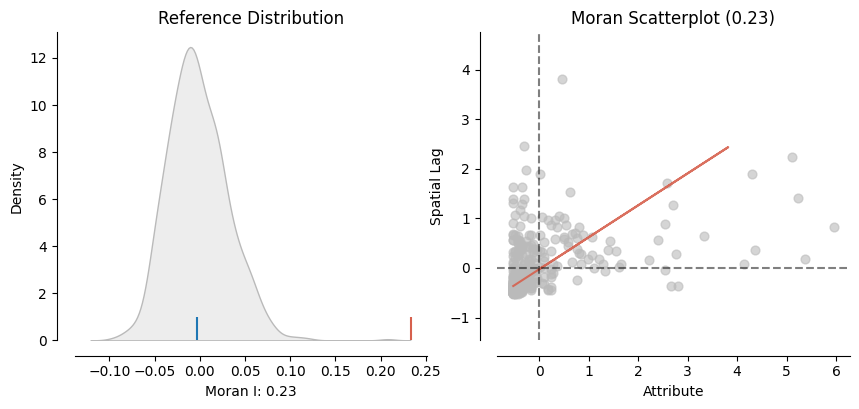

In [14]:
plot_moran(global_informal);

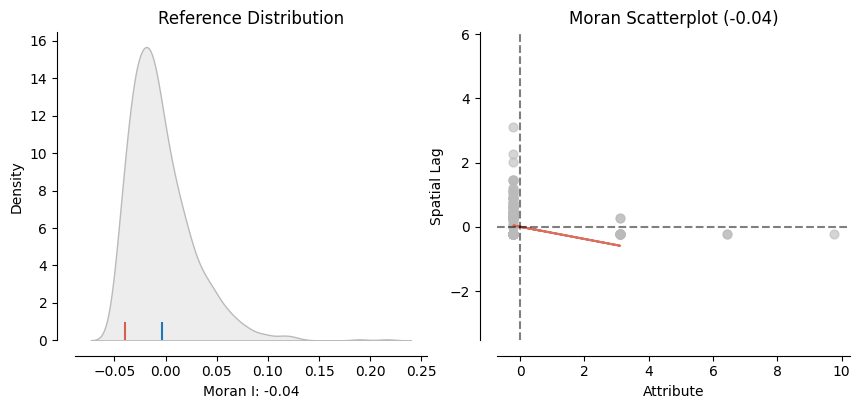

In [15]:
plot_moran(global_calle);

('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 375, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 380, ' is an island (no neighbors)')
('WARNING: ', 381, ' is an island (no neighbors)')
('WARNING: ', 386, ' is an island (no neighbors)')
('WARNING: ', 387, ' is an island (no neighbors)')
('WARNING: ', 395, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 407, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 412, ' is an island (no neighbors)')
('WARNING: ', 416, ' is an island (no neighbors)')
('WARNING: ', 418, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an isla

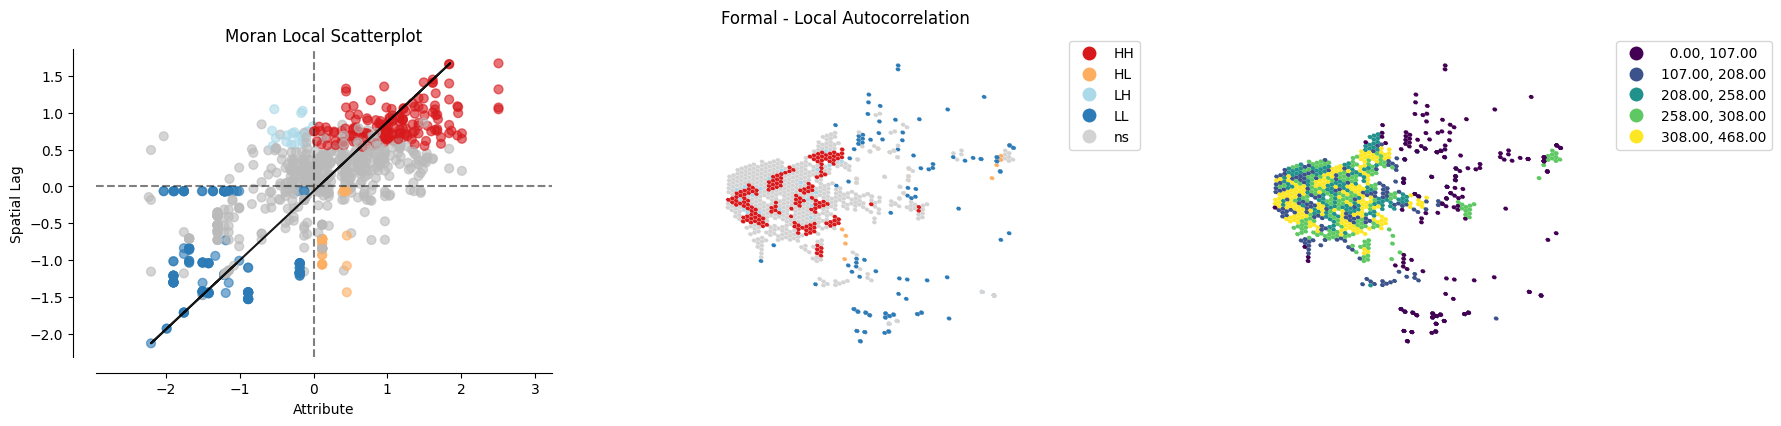

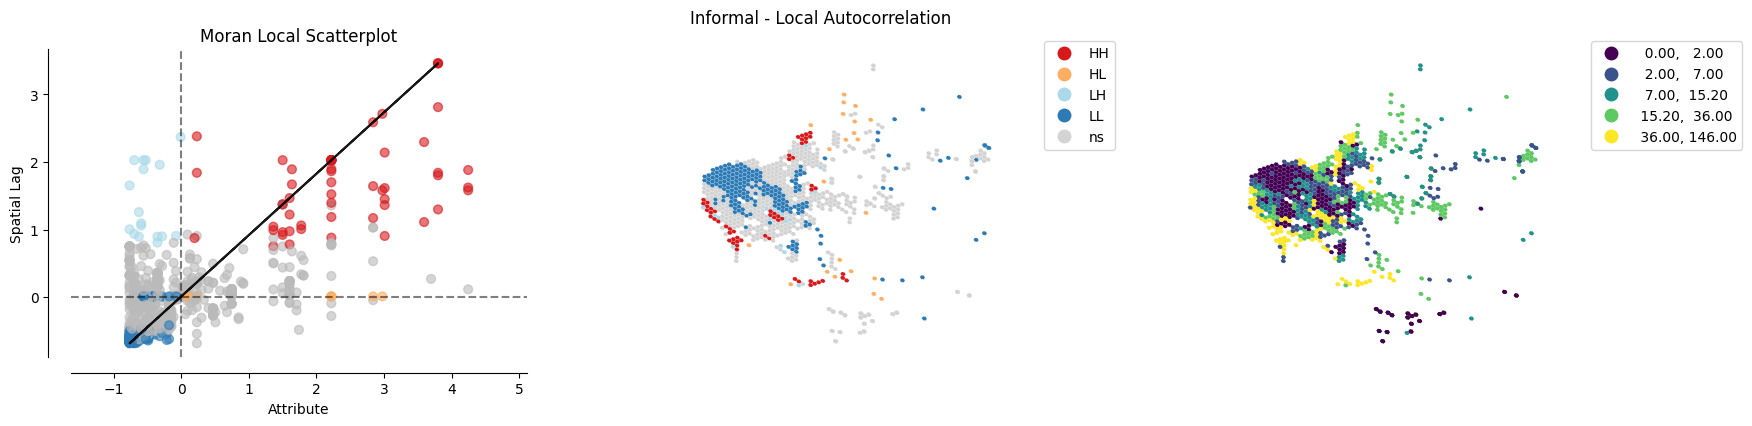

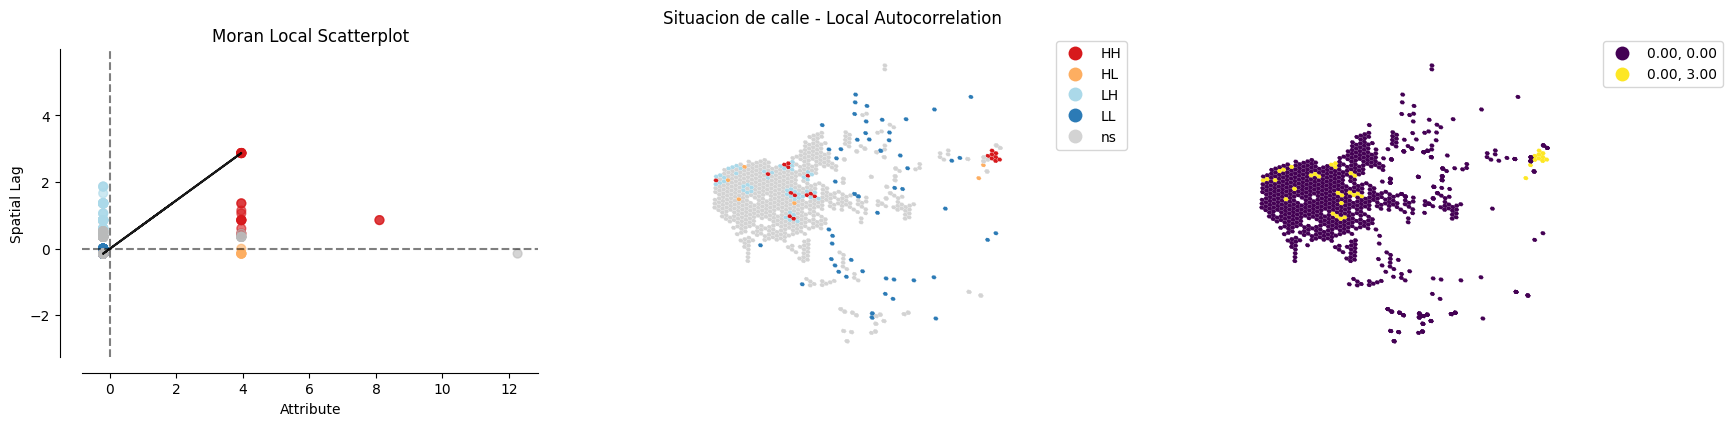

In [16]:
plot_local_autocorrelation(
    tipo_vivienda_2001_h3, ["formal","informal", "situacion de calle"], figsize=(20, 4)
)

## 2010 

In [17]:
P_VALUE = 0.05

indicadores = ["formal", "informal", "situacion de calle"]
lisas_2010 = lisa(tipo_vivienda_agg_2010, indicadores)
lisas_2010 = dict(zip(indicadores, lisas_2010))

full = pd.DataFrame(
    {
        "formal": lisas_2010["formal"].Is,
        "informal": lisas_2010["informal"].Is,
        "situacion de calle": lisas_2010["situacion de calle"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

('WARNING: ', 62, ' is an island (no neighbors)')


formal                0.532934
informal              0.619760
situacion de calle    0.011976
dtype: float64

In [18]:
global_formal, global_informal, global_calle =  lisa(tipo_vivienda_agg_2010, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I, global_calle.I)];

('WARNING: ', 62, ' is an island (no neighbors)')
Autocorrelación espacial global:0.31
Autocorrelación espacial global:0.22
Autocorrelación espacial global:-0.01


In [19]:
[print(f"Significatividad estadística:{round(i,2)}") for i in (global_formal.p_sim, global_informal.p_sim, global_calle.p_sim)];

Significatividad estadística:0.0
Significatividad estadística:0.0
Significatividad estadística:0.43


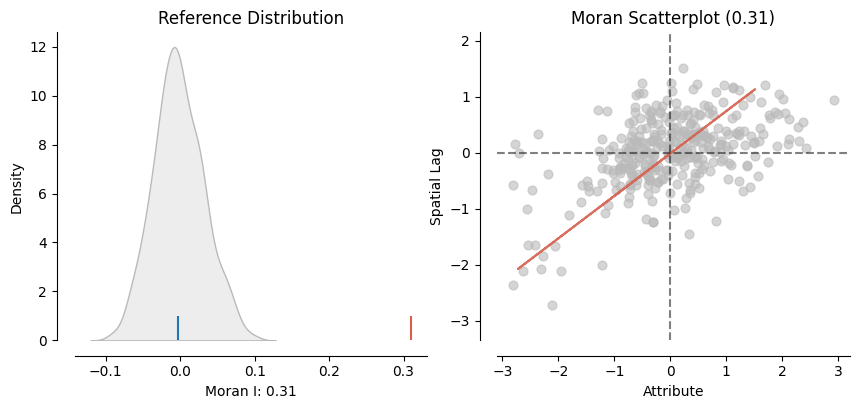

In [20]:
plot_moran(global_formal);

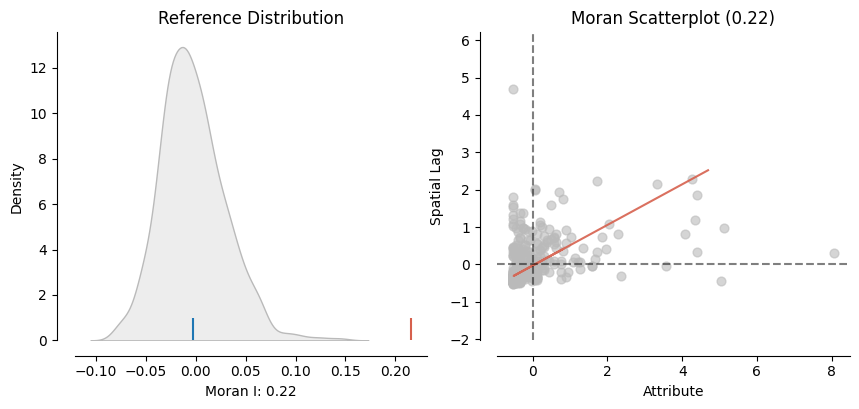

In [21]:
plot_moran(global_informal);

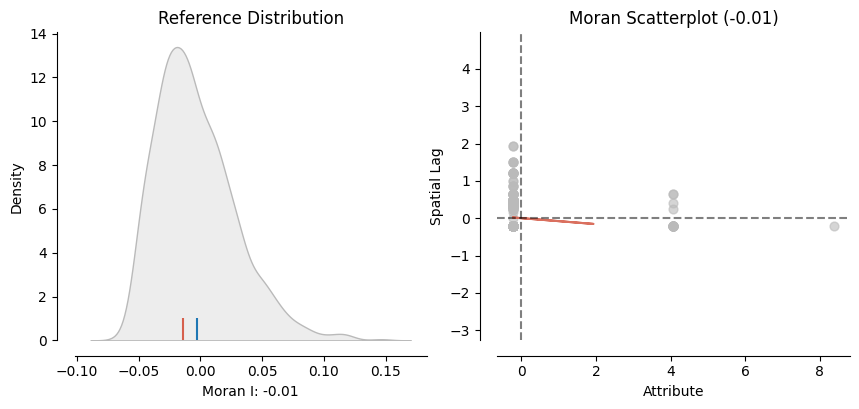

In [22]:
plot_moran(global_calle);

('WARNING: ', 319, ' is an island (no neighbors)')
('WARNING: ', 320, ' is an island (no neighbors)')
('WARNING: ', 324, ' is an island (no neighbors)')
('WARNING: ', 325, ' is an island (no neighbors)')
('WARNING: ', 328, ' is an island (no neighbors)')
('WARNING: ', 329, ' is an island (no neighbors)')
('WARNING: ', 330, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 336, ' is an island (no neighbors)')
('WARNING: ', 337, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 359, ' is an island (no neighbors)')
('WARNING: ', 362, ' is an island (no neighbors)')
('WARNING: ', 365, ' is an island (no neighbors)')
('WARNING: ', 367, ' is an island (no neighbors)')
('WARNING: ', 368, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an isla

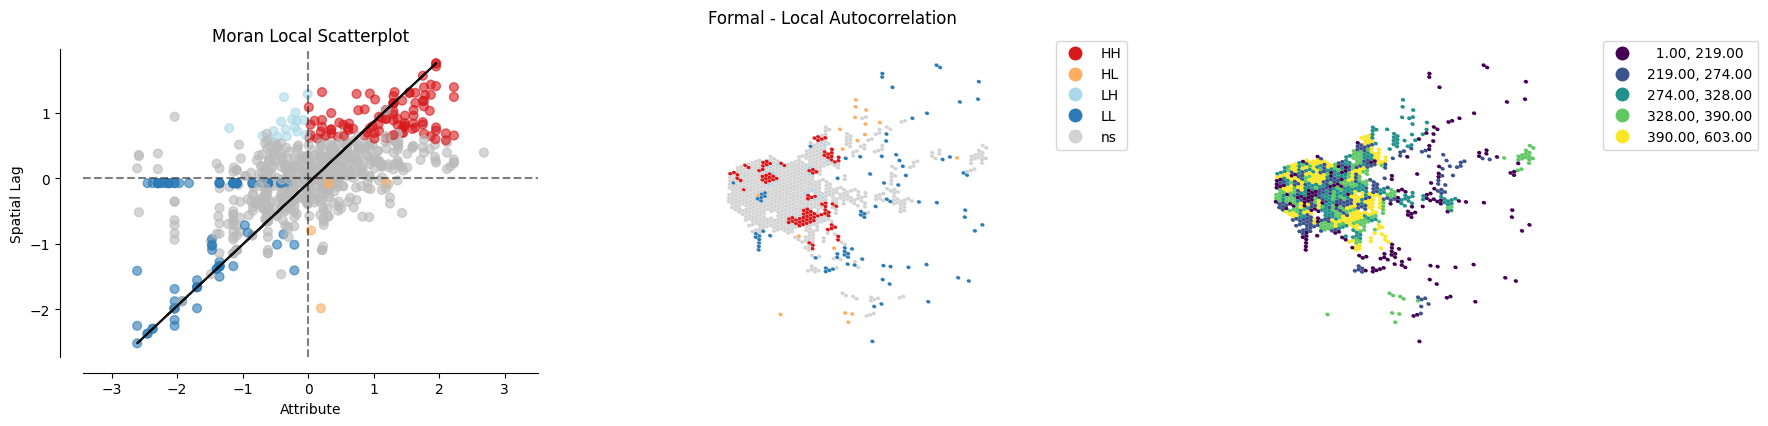

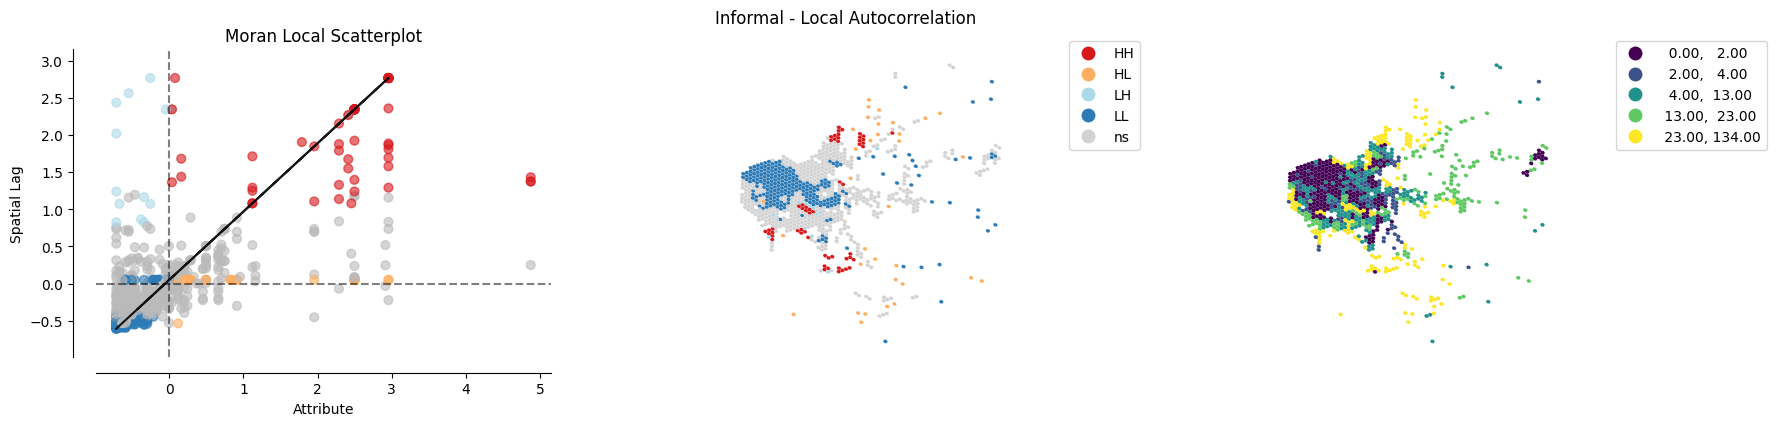

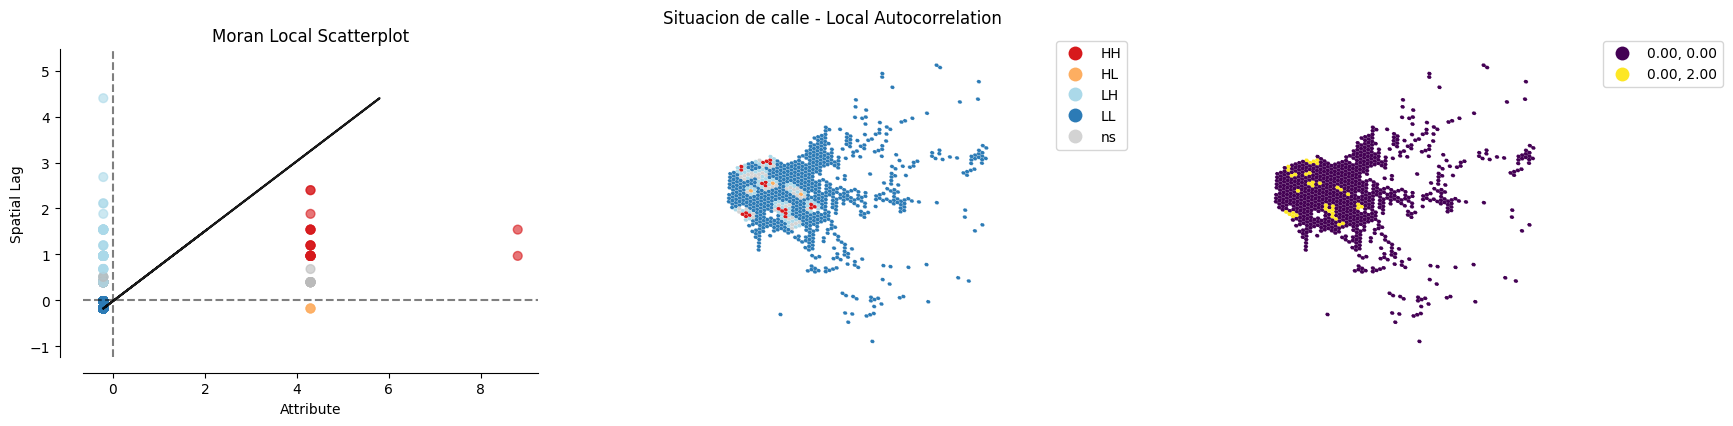

In [23]:
plot_local_autocorrelation(
    tipo_vivienda_2010_h3, ["formal", "informal", "situacion de calle"], figsize=(20, 4)
)

## 2020

In [24]:
P_VALUE = 0.05

indicadores = ["formal", "informal"]
lisas_2020 = lisa(tipo_vivienda_agg_2020, indicadores)
lisas_2020 = dict(zip(indicadores, lisas_2020))

full = pd.DataFrame(
    {
        "formal": lisas_2020["formal"].Is,
        "informal": lisas_2020["informal"].Is,
    }
)
mean = (full > P_VALUE).mean(axis=0)
mean

formal      0.492013
informal    0.661342
dtype: float64

In [25]:
lisas_2020 = lisa(tipo_vivienda_agg_2020, indicadores)

In [26]:
global_formal, global_informal =  lisa(tipo_vivienda_agg_2020, indicadores, local=False)
[print(f"Autocorrelación espacial global:{round(i,2)}") for i in (global_formal.I, global_informal.I)];

Autocorrelación espacial global:0.2
Autocorrelación espacial global:0.29


In [27]:
[print(f"Significatividad estadística:{round(i,2)}") for i in (global_formal.p_sim, global_informal.p_sim)];

Significatividad estadística:0.0
Significatividad estadística:0.0


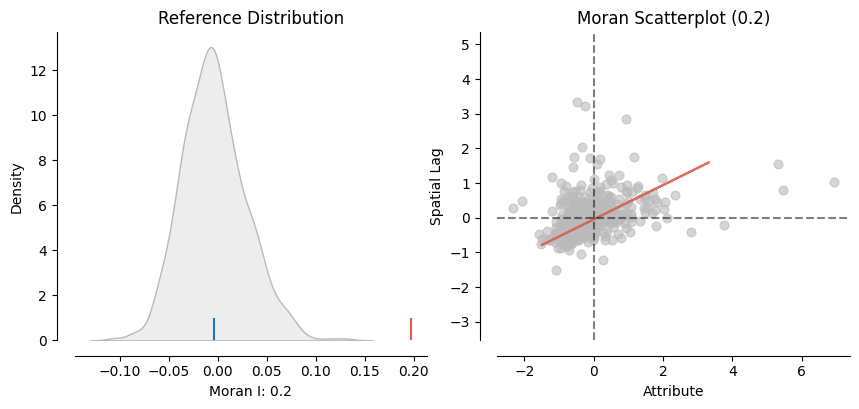

In [28]:
plot_moran(global_formal);

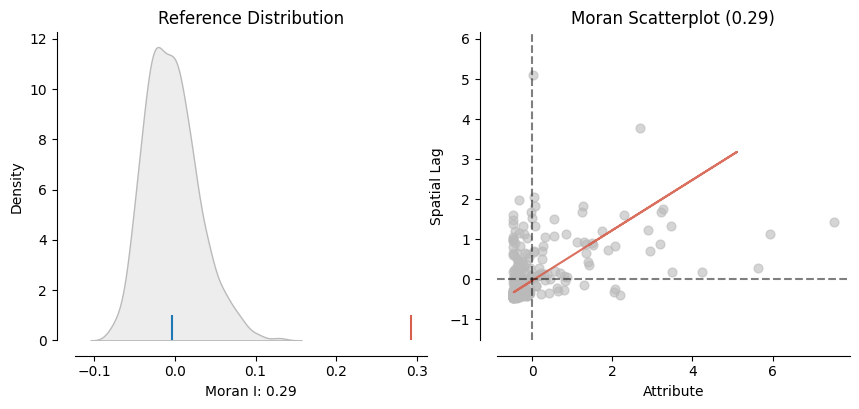

In [29]:
plot_moran(global_informal);

A la izquierda se observa la distribución empírica que resulta de generar 999 mapas aleatorios (el *default* del parámetro [permutations](https://pysal.org/esda/generated/esda.Moran.html) de la clase `esda.Moran`) con la variable "viviendas informales" y calcular el índice de asociación en cada uno de ellos. La distribución que se muestra con la marca azul es el promedio de esas 999 permutaciones. La marca roja, en cambio, es el resultado que obtuvimos a partir de nuestras observaciones. Si comparamos ambas marcas, se ve que esta última es significativamente diferente al de la distribución generada de manera totalmente aleatoria.

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an island (no neighbors)')
('WARNING: ', 444, ' is an island (no neighbors)')
('WARNING: ', 458, ' is an island (no neighbors)')
('WARNING: ', 474, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an island (no neighbors)')
('WARNING: ', 444, ' is an island (no neighbors)')
('WARNING: ', 458, ' is an island (no neighbors)')
('WARNING: ', 474, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')


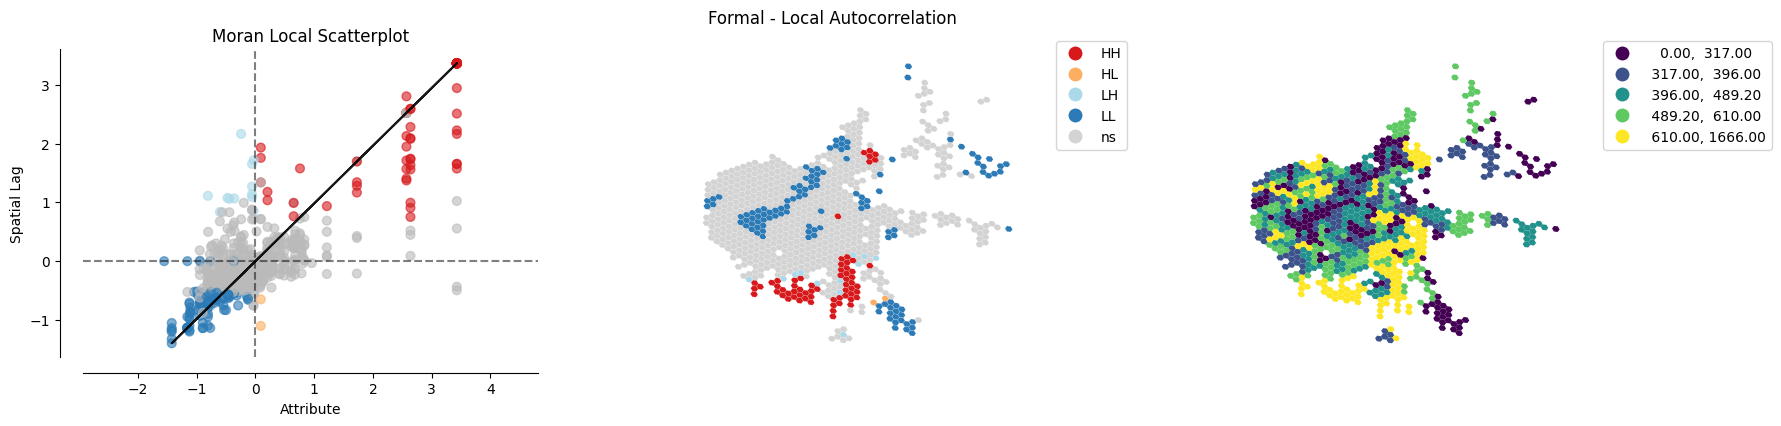

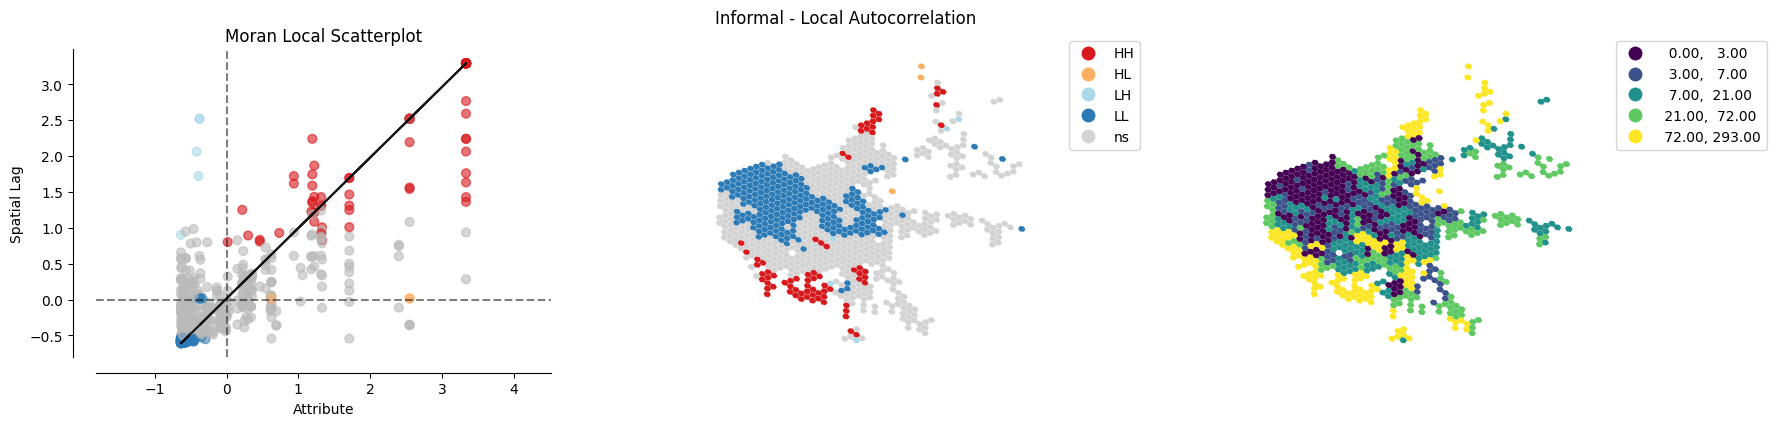

In [30]:
plot_local_autocorrelation(
    tipo_vivienda_2020_h3, ["formal", "informal"], figsize=(20, 4)
)

## 2.3. Evolución del patrón espacial de informalidad urbana

('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 375, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 380, ' is an island (no neighbors)')
('WARNING: ', 381, ' is an island (no neighbors)')
('WARNING: ', 386, ' is an island (no neighbors)')
('WARNING: ', 387, ' is an island (no neighbors)')
('WARNING: ', 395, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 407, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 412, ' is an island (no neighbors)')
('WARNING: ', 416, ' is an island (no neighbors)')
('WARNING: ', 418, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an isla

Text(0.5, 0.98, '2020 - Informal')

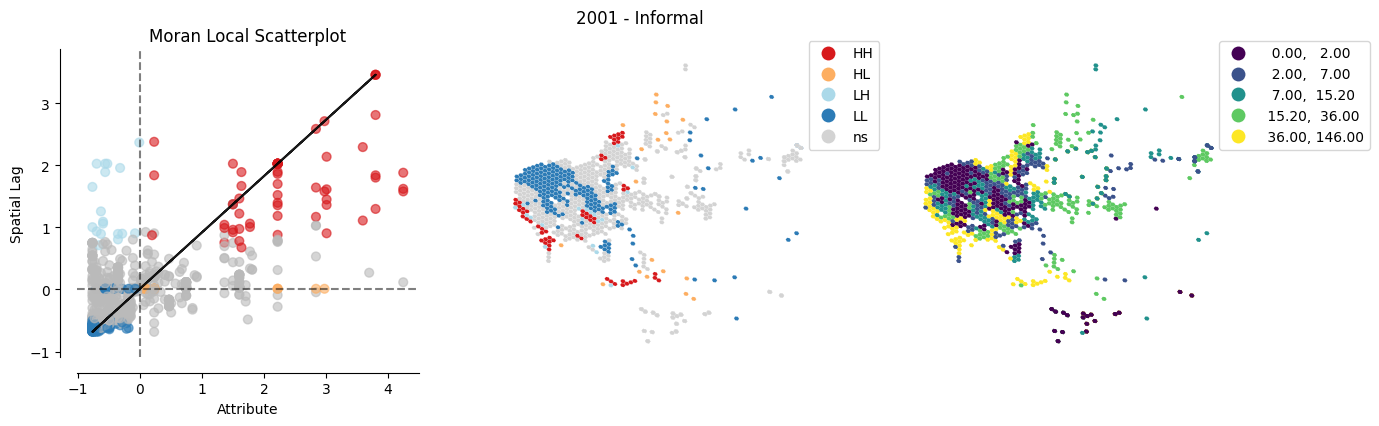

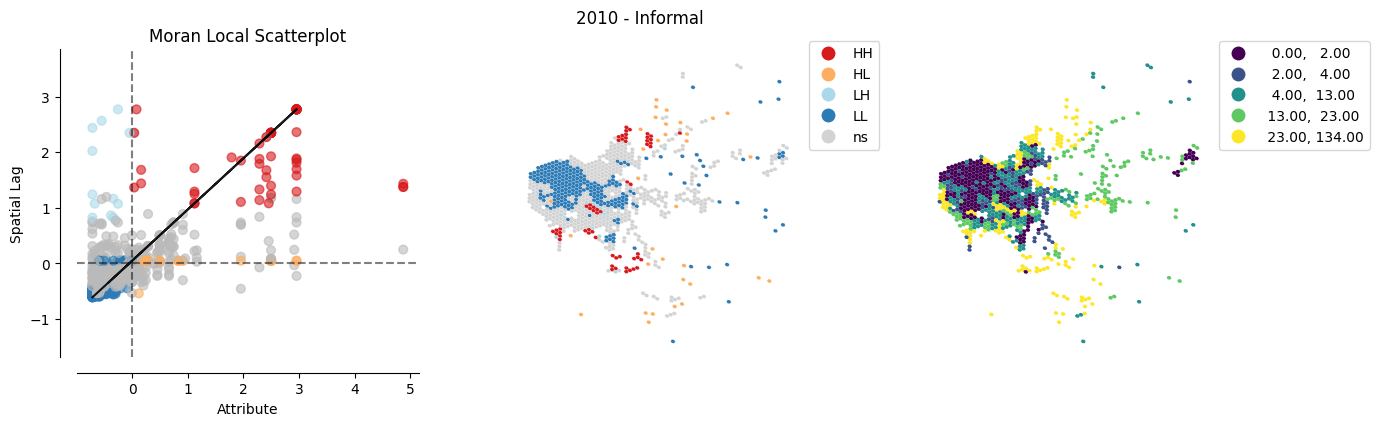

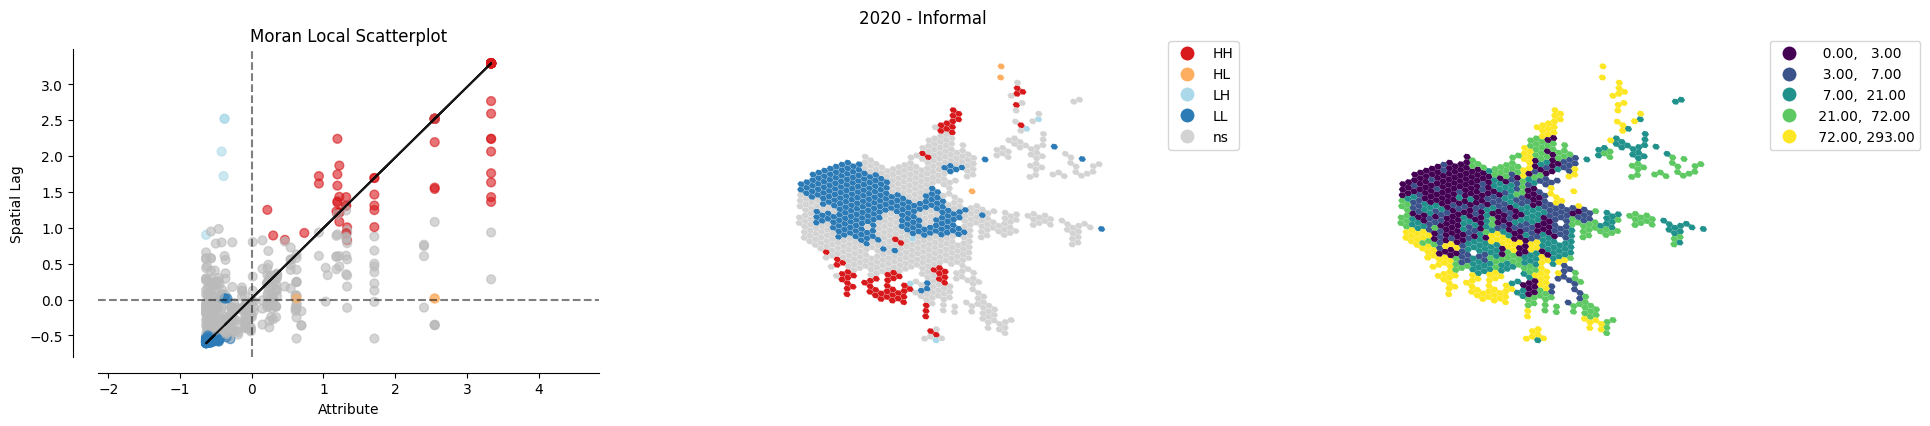

In [31]:
import matplotlib.pyplot as plt

indicador = "informal"
plot_local_autocorrelation(tipo_vivienda_2001_h3, [indicador], figsize=(15, 4))
plt.suptitle(f"2001 - {indicador.capitalize()}")
plot_local_autocorrelation(tipo_vivienda_2010_h3, [indicador], figsize=(15, 4))
plt.suptitle(f"2010 - {indicador.capitalize()}")
plot_local_autocorrelation(tipo_vivienda_2020_h3, [indicador], figsize=(22, 4))
plt.suptitle(f"2020 - {indicador.capitalize()}")

## 2.3. Análisis bivariado

In [32]:
from CENSAr.clustering.moran import lisa_bv
from CENSAr.plots import plot_local_autocorrelation_bv

## 2001

In [33]:
lisa_bv_IF_2001 = lisa_bv(tipo_vivienda_2001_h3, "informal", "formal", local=False)
lisa_bv_FI_2001 = lisa_bv(tipo_vivienda_2001_h3, "formal", "informal", local=False)

global_bv = [lisa_bv_IF_2001,lisa_bv_FI_2001]

[print(f"Autocorrelación espacial global:{round(i.I,2)}") for i in global_bv]
[print(f"Significatividad estadística:{round(i.p_sim,2)}") for i in global_bv];

('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 375, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 380, ' is an island (no neighbors)')
('WARNING: ', 381, ' is an island (no neighbors)')
('WARNING: ', 386, ' is an island (no neighbors)')
('WARNING: ', 387, ' is an island (no neighbors)')
('WARNING: ', 395, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 407, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 412, ' is an island (no neighbors)')
('WARNING: ', 416, ' is an island (no neighbors)')
('WARNING: ', 418, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an isla

('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 371, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 377, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 381, ' is an island (no neighbors)')
('WARNING: ', 383, ' is an island (no neighbors)')
('WARNING: ', 387, ' is an island (no neighbors)')
('WARNING: ', 388, ' is an island (no neighbors)')
('WARNING: ', 391, ' is an island (no neighbors)')
('WARNING: ', 393, ' is an island (no neighbors)')
('WARNING: ', 402, ' is an island (no neighbors)')
('WARNING: ', 405, ' is an island (no neighbors)')
('WARNING: ', 406, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 414, ' is an island (no neighbors)')
('WARNING: ', 417, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an isla

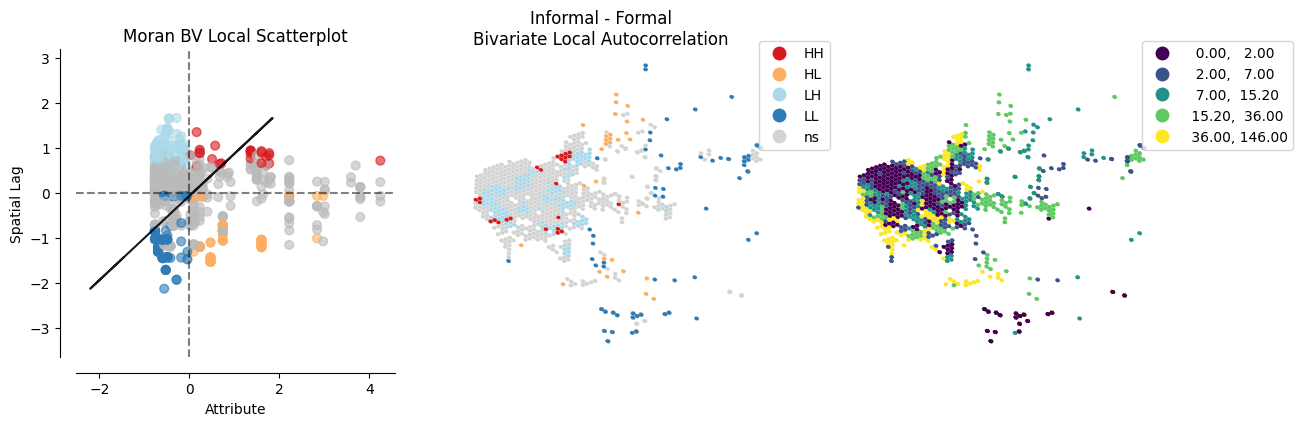

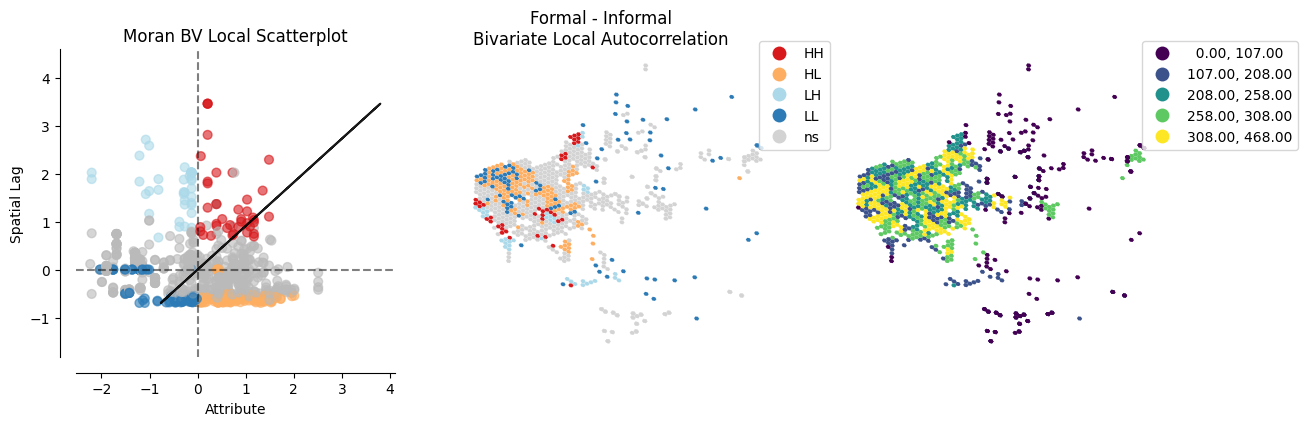

In [ ]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2001_h3, "informal", "formal", figsize=(14, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2001_h3, "formal", "informal", figsize=(14, 4)
)

## 2010

In [35]:
lisa_bv_IF_2010 = lisa_bv(tipo_vivienda_2010_h3, "informal", "formal", local=False)
lisa_bv_FI_2010 = lisa_bv(tipo_vivienda_2010_h3, "formal", "informal", local=False)

global_bv = [lisa_bv_IF_2010,lisa_bv_FI_2010]

[print(f"Autocorrelación espacial global:{round(i.I,2)}") for i in global_bv]
[print(f"Significatividad estadística:{round(i.p_sim,2)}") for i in global_bv];

('WARNING: ', 319, ' is an island (no neighbors)')
('WARNING: ', 320, ' is an island (no neighbors)')
('WARNING: ', 324, ' is an island (no neighbors)')
('WARNING: ', 325, ' is an island (no neighbors)')
('WARNING: ', 328, ' is an island (no neighbors)')
('WARNING: ', 329, ' is an island (no neighbors)')
('WARNING: ', 330, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 336, ' is an island (no neighbors)')
('WARNING: ', 337, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 359, ' is an island (no neighbors)')
('WARNING: ', 362, ' is an island (no neighbors)')
('WARNING: ', 365, ' is an island (no neighbors)')
('WARNING: ', 367, ' is an island (no neighbors)')
('WARNING: ', 368, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an isla

('WARNING: ', 318, ' is an island (no neighbors)')
('WARNING: ', 325, ' is an island (no neighbors)')
('WARNING: ', 328, ' is an island (no neighbors)')
('WARNING: ', 329, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 333, ' is an island (no neighbors)')
('WARNING: ', 338, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 345, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 358, ' is an island (no neighbors)')
('WARNING: ', 359, ' is an island (no neighbors)')
('WARNING: ', 361, ' is an island (no neighbors)')
('WARNING: ', 366, ' is an island (no neighbors)')
('WARNING: ', 375, ' is an island (no neighbors)')
('WARNING: ', 377, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 381, ' is an isla

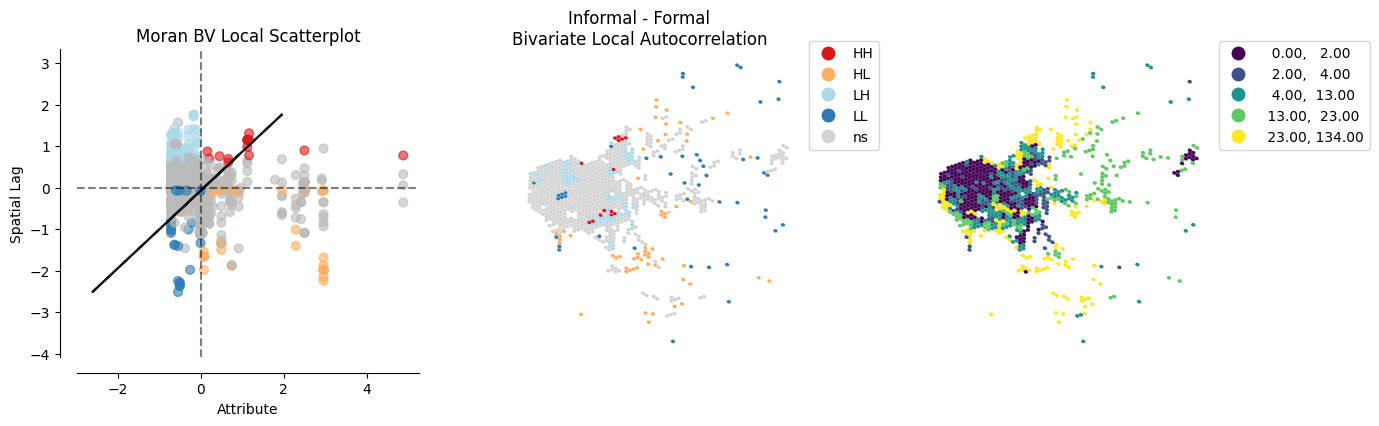

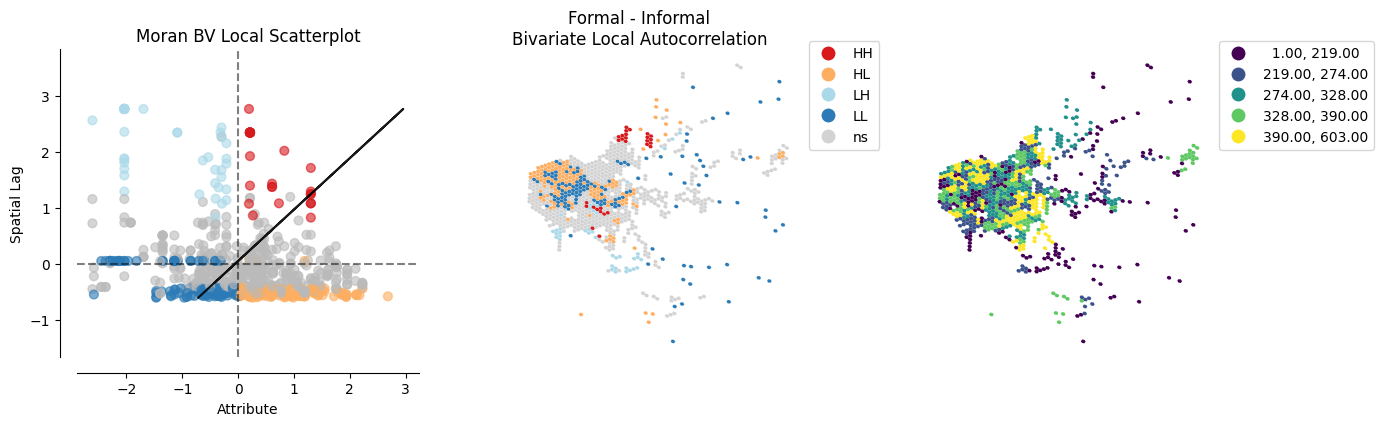

In [ ]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2010_h3, "informal", "formal", figsize=(15, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2010_h3, "formal", "informal", figsize=(15, 4)
)

## 2020

In [ ]:
lisa_bv_IF_2020 = lisa_bv(tipo_vivienda_2020_h3, "informal", "formal", local=False)
lisa_bv_FI_2020 = lisa_bv(tipo_vivienda_2020_h3, "formal", "informal", local=False)

global_bv = [lisa_bv_IF_2020,lisa_bv_FI_2020]

[print(f"Autocorrelación espacial global:{round(i.I,2)}") for i in global_bv]
[print(f"Significatividad estadística:{round(i.p_sim,2)}") for i in global_bv];

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 421, ' is an island (no neighbors)')
('WARNING: ', 442, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no neighbors)')
('WARNING: ', 480, ' is an island (no neighbors)')
('WARNING: ', 482, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 421, ' is an island (no neighbors)')
('WARNING: ', 442, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no neighbors)')
('WARNING: ', 480, ' is an island (no neighbors)')
('WARNING: ', 482, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')
Autocorrelación espacial global:0.45
Autocorrelación espacial global:0.46
Significatividad estadística:0.0
Significatividad estadística:0.0


('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 421, ' is an island (no neighbors)')
('WARNING: ', 442, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no neighbors)')
('WARNING: ', 480, ' is an island (no neighbors)')
('WARNING: ', 482, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 421, ' is an island (no neighbors)')
('WARNING: ', 442, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no neighbors)')
('WARNING: ', 480, ' is an island (no neighbors)')
('WARNING: ', 482, ' is an island (no neighbors)')
('WARNING: ', 566, ' is an island (no neighbors)')


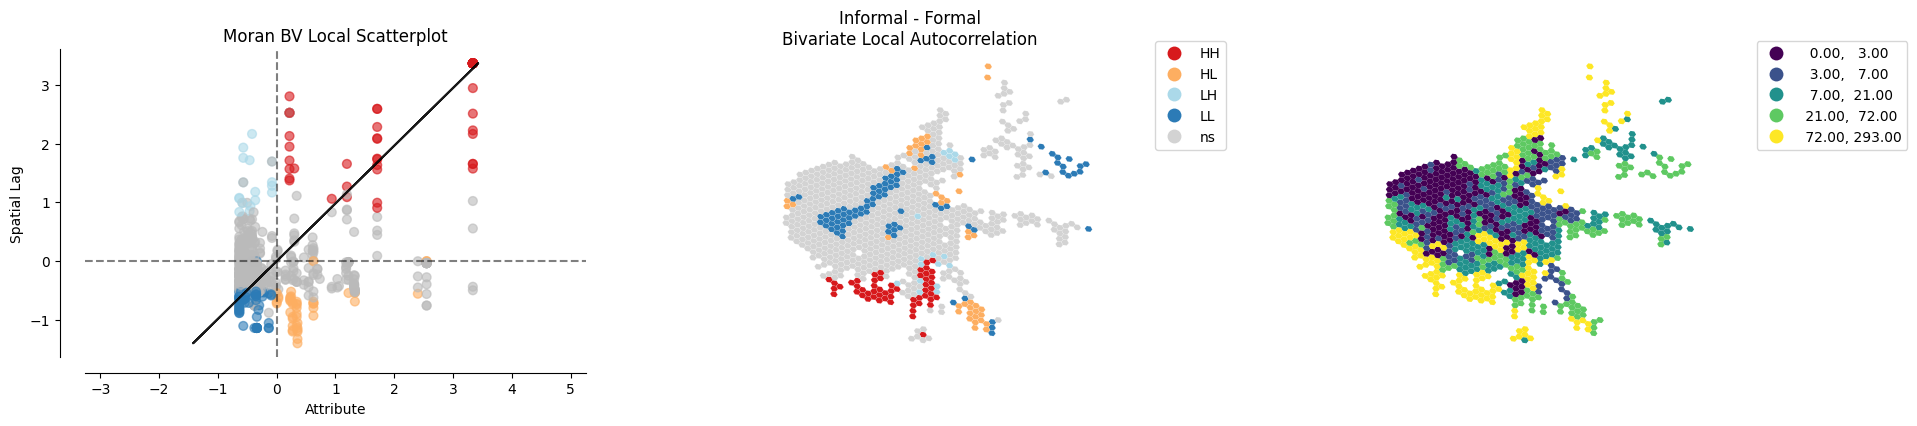

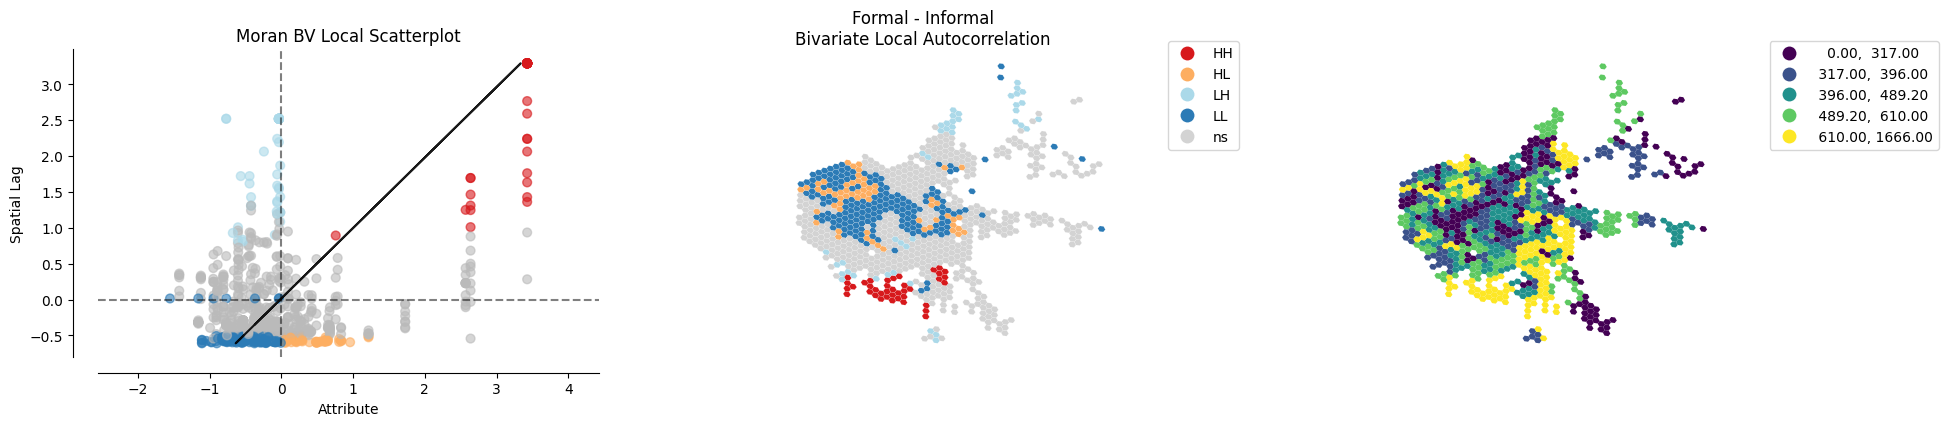

In [ ]:
plot_local_autocorrelation_bv(
    tipo_vivienda_2020_h3, "informal", "formal", figsize=(22, 4)
)
plot_local_autocorrelation_bv(
    tipo_vivienda_2020_h3, "formal", "informal", figsize=(22, 4)
)